# <span style="color:Maroon">Data Gathering and Basic Analysis

<span style="color:Blue">__Summary:__ In this file we shall download the data from Yahoo Finance and carry out basic analysis on it. 

In [1]:
# Import required libraries
import warnings
warnings.filterwarnings('ignore')
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm
import os
np.random.seed(0)

In [2]:
# User defined names
index = "BTC-USD"
ticker = "BTC-USD"
# Define the date range
start_date = '2011-01-01'
end_date = '2020-12-31'

In [3]:
# Get current working directory
mycwd = os.getcwd()
print(mycwd)

C:\Users\sidhu\Downloads\Course 10 Capstone Project\Trading Strategy Development\Dev\BTC-USD\Codes


In [4]:
# Change to data directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")

## <span style="color:Maroon">Functions

In [5]:
# Function to get Adjusted close price of the stock
def Get_AdjClosed_Price(ticker, start_date, end_date):
    """
        Returns a pandas dataframe with adjusted close price
    """
    df = data.DataReader(ticker, 'yahoo', start_date, end_date)
    return df

In [6]:
def Get_LogReturn(df, var_in, var_out):
    """
        Calculates the log returns
    """
    df[var_out] = np.log(df[var_in]).diff()
    return df

In [7]:
def Print_Fromated_metrics(df, stock, var):
    """
        Prints the below values for the given variable:
            1. Mean
            2. Standard Deviation
            3. Skewness
            4. Kurtosis
            4. Excess Kurtosis
    """
    print("++++++++++++++++++++++++++++++++")
    print("             Stock: {0}".format(stock))
    print("              Mean: {:.6f}".format(df[var].mean()))
    print("Standard Deviation: {:.6f}".format(df[var].std()))
    print("          Skewness: {:.6f}".format(df[var].skew()))
    print("          Kurtosis: {:.6F}".format(df[var].kurtosis()))
    print("   Excess Kurtosis: {:.6f}".format(df[var].kurtosis()-3))
    print("++++++++++++++++++++++++++++++++")
    return

## <span style="color:Maroon">Download the Data

In [8]:
# Download S&P500, and NIFTY Data for the given date range
df = Get_AdjClosed_Price(ticker, start_date, end_date)

In [9]:
# Calculate log returns
df = Get_LogReturn(df, 'Adj Close', 'log returns')

In [10]:
# Head of data
df.head()

,High,Low,Open,Close,Volume,Adj Close,log returns
Date,,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015,NaN
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002,-0.074643
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990,-0.072402
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992,0.035111
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014,-0.024968


## <span style="color:Maroon">Basic Exploratary Analysis

In [11]:
# Change to Images directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Images")

### <span style="color:Maroon">Histogram of Returns

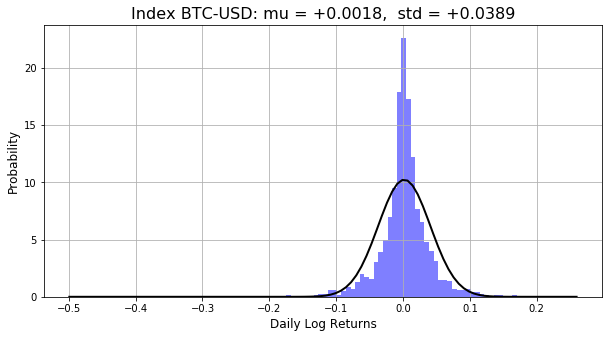

In [12]:
# Fit a normal distribution to the data:
mu, std = norm.fit(df['log returns'].dropna())
# Histogram for log returns
plt.figure(figsize=(10,5))
plt.hist(df['log returns'].dropna(), bins=100, density=True, facecolor='b', alpha=0.5)
# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Index {}: mu = {:+.4f},  std = {:+.4f}".format(index, mu, std)
plt.title(title, fontsize=16)
plt.xlabel("Daily Log Returns", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.grid()
plt.savefig('histogram of returns ' + str(index) +'.png')
plt.show()
plt.close()

__Comments:__ <span style="color:Blue"> Based on above plot, we can conclude that the log returns are not normally distributed

### <span style="color:Maroon">Time Series Plot of Returns

In [13]:
plt.figure(figsize=(10,5))
plt.plot(df['log returns'], alpha=0.5)
plt.title('{} Log Returns'.format(index), fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.grid()
plt.savefig('Time series of returns ' + str(index) +'.png')
plt.close()

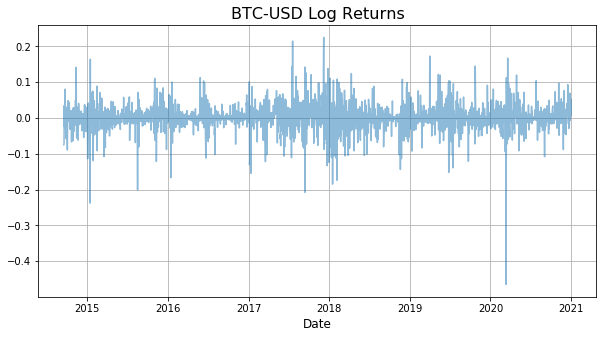

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df['log returns'], alpha=0.5)
plt.title('{} Log Returns'.format(index), fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.grid()
plt.show()

__Comments:__ <span style="color:Blue"> There are certain period of high volatility (Jun, 2011 to Dec, 2011, Feb 2020 to April, 2020)

### <span style="color:Maroon">Volume Plot

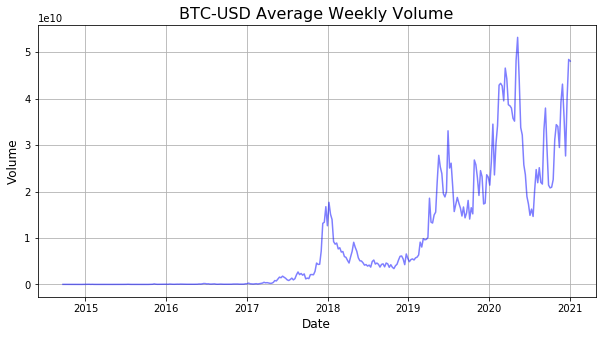

In [15]:
# Volume Plot at Weekly Level
# Resample the data at weekly level
df_weekly =df.resample('W').mean()

plt.figure(figsize=(10,5))
plt.plot(df_weekly['Volume'], 'b-', alpha=0.5)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volume", fontsize=12)
plt.title("{} Average Weekly Volume".format(index), fontsize=16)
plt.grid()
plt.savefig('Weekly Volume Plot ' + str(index) +'.png')
plt.show()
plt.close()

__Comments:__ <span style="color:Blue"> COVID had a big impact on volume of the Index, and it is reflected in above chart after Feb-Mar, 2020

### <span style="color:Maroon">Basic Statistics for Log Returns

In [16]:
# Get basic statistics for log returns
Print_Fromated_metrics(df, index, 'log returns')

++++++++++++++++++++++++++++++++
             Stock: BTC-USD
              Mean: 0.001810
Standard Deviation: 0.038955
          Skewness: -0.924658
          Kurtosis: 13.232225
   Excess Kurtosis: 10.232225
++++++++++++++++++++++++++++++++


## <span style="color:Maroon">Save the Data

In [17]:
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")
df.drop("log returns", axis=1, inplace=True)
df.to_csv(index +".csv", index=True)